In [2]:
# %load ./imports.py
# %load /Users/bartev/dev/github-bv/sporty/notebooks/imports.py

## Where am I
!echo $VIRTUAL_ENV

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# magics
%load_ext blackcellmagic
# start cell with `%%black` to format using `black`

%load_ext autoreload
# start cell with `%autoreload` to reload module
# https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html

# reload all modules when running
%autoreload 2

# imports

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

from importlib import reload
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# https://plotnine.readthedocs.io/en/stable/

import plotnine as p9
from plotnine import ggplot, aes, facet_wrap

from src.utils import lower_case_col_names, drop_suffix
import src.data.load_data as ld
from src.data.load_data import get_nba_game_team_points, load_nba, load_nba_games_dataset


/Users/bartev/.venvs/sport


# Summary Statistics

Central tendency
* mean
* median
* mode

Variation
* variance
* standard deviation
* coefficient of variation (std dev / mean. between 0 and 1)


In [12]:
nba_games = load_nba_games_dataset()

/Users/bartev/dev/github-bv/sporty/src/utils.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/bartev/dev/github-bv/sporty/src/utils.py:13: FutureWarning: The default value of regex will change from True to False in a future version.


In [7]:
nba_games.head()

,game_date_est,game_id,season,home_team_wins,team_id,pts,fg_pct,ft_pct,fg3_pct,ast,reb,ha,wl,nickname,city,fgm,fga,fg3m,fg3a,ftm,fta
811,2018-09-28,11800002,2018,1,1610612738,97.000,0.346,0.727,0.191,12.000,56.000,away,L,Celtics,Boston,36.000,104.000,9.000,47.000,16.000,22.000
1671,2018-09-28,11800002,2018,1,1610612766,104.000,0.382,0.641,0.306,17.000,65.000,home,W,Hornets,Charlotte,34.000,89.000,11.000,36.000,25.000,39.000
164,2018-09-29,11800003,2018,1,1610612761,122.000,0.415,0.824,0.343,15.000,45.000,home,W,Raptors,Toronto,34.000,82.000,12.000,35.000,42.000,51.000
422,2018-09-29,11800003,2018,1,1610612757,104.000,0.420,0.720,0.387,25.000,46.000,away,L,Trail Blazers,Portland,37.000,88.000,12.000,31.000,18.000,25.000
55,2018-09-29,11800005,2018,0,1610612744,110.000,0.473,0.769,0.353,33.000,48.000,home,L,Warriors,Golden State,44.000,93.000,12.000,34.000,10.000,13.000


In [13]:
nba_games.dtypes

game_date_est      object
game_id            object
season              int64
home_team_wins      int64
team_id            object
pts               float64
fg_pct            float64
ft_pct            float64
fg3_pct           float64
ast               float64
reb               float64
ha                 object
wl                 object
nickname           object
city               object
fgm               float64
fga               float64
fg3m              float64
fg3a              float64
ftm               float64
fta               float64
dtype: object

In [14]:
nba_games.describe(include='all')

,game_date_est,game_id,season,home_team_wins,team_id,pts,fg_pct,ft_pct,fg3_pct,ast,reb,ha,wl,nickname,city,fgm,fga,fg3m,fg3a,ftm,fta
count,2756,2756,"2,756.000","2,756.000",2756,"2,756.000","2,756.000","2,756.000","2,756.000","2,756.000","2,756.000",2756,2756,2756,2756,"2,756.000","2,756.000","2,756.000","2,756.000","2,756.000","2,756.000"
unique,228,1378,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,2,2,30,29,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-04-07,41800234,NaN,NaN,1610612761,NaN,NaN,NaN,NaN,NaN,NaN,home,W,Raptors,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN
freq,28,2,NaN,NaN,110,NaN,NaN,NaN,NaN,NaN,NaN,1378,1378,110,179,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.588,0.588,NaN,110.934,0.460,0.767,0.354,24.422,45.224,NaN,NaN,NaN,NaN,40.833,89.038,11.327,32.020,17.940,23.412
std,NaN,NaN,0.492,0.492,NaN,12.645,0.054,0.102,0.087,5.112,6.706,NaN,NaN,NaN,NaN,5.251,7.388,3.727,7.290,6.168,7.569
min,NaN,NaN,0.000,0.000,NaN,68.000,0.278,0.263,0.100,10.000,22.000,NaN,NaN,NaN,NaN,25.000,64.000,2.000,12.000,2.000,4.000
25%,NaN,NaN,0.000,0.000,NaN,102.000,0.422,0.700,0.296,21.000,41.000,NaN,NaN,NaN,NaN,37.000,84.000,9.000,27.000,14.000,18.000
50%,NaN,NaN,1.000,1.000,NaN,111.000,0.459,0.770,0.351,24.000,45.000,NaN,NaN,NaN,NaN,41.000,89.000,11.000,32.000,18.000,23.000
75%,NaN,NaN,1.000,1.000,NaN,119.000,0.494,0.839,0.409,28.000,50.000,NaN,NaN,NaN,NaN,44.000,93.000,14.000,37.000,22.000,28.000


In [15]:
nba_games['pts'].describe()

count   2,756.000
mean      110.934
std        12.645
min        68.000
25%       102.000
50%       111.000
75%       119.000
max       168.000
Name: pts, dtype: float64

In [16]:
nba_games['pts'].mean()

110.93359941944847

In [17]:
nba_games['pts'].median()

111.0

In [18]:
nba_games['pts'].std()

12.645162180360032

In [20]:
nba_games.groupby(['wl']).mean()

,season,home_team_wins,pts,fg_pct,ft_pct,fg3_pct,ast,reb,fgm,fga,fg3m,fg3a,ftm,fta
wl,,,,,,,,,,,,,,
L,0.588,0.588,105.052,0.436,0.755,0.324,22.809,43.179,38.812,89.177,10.331,31.892,17.097,22.647
W,0.588,0.588,116.815,0.483,0.779,0.384,26.036,47.269,42.855,88.899,12.323,32.149,18.782,24.176


In [22]:
nba_games['game_date_est'].describe()

count           2756
unique           228
top       2019-04-07
freq              28
Name: game_date_est, dtype: object

# Visualizing data

## Histogram

array([[<AxesSubplot:title={'center':'pts'}>]], dtype=object)

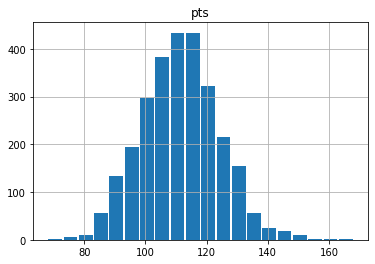

In [48]:
nba_games.hist(
    column="pts",
#     by="wl",   # groupby
    grid=True,
    sharex=True,
#     layout=(2, 1),  # arrangement of axes
#     figsize=(5, 10),
    bins=20,
    rwidth=0.9,  # leave space between bins
)
